In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Data Handling: Load CSV
df = pd.read_csv("Training_Scores.csv")
x = df.drop(columns=(["classification"]), axis = 1)
y = df["classification"]
# get to know list of features, data shape, stat. description.
print(x.shape)

print("First 5 lines:")
print(x.head(5))


print("info: ")
print(x.info())

"""Since all variables are of float and int type, so this data is easy to handle for modeling"""

(67, 3)
First 5 lines:
   Gunning Fog Index  Flesch Reading Ease  Flesch-Kincaid Grade
0               9.76                59.85                  6.01
1               8.63                66.35                  5.11
2              10.24                54.20                  6.51
3               9.47                56.05                  6.33
4               9.39                55.94                  6.27
info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gunning Fog Index     67 non-null     float64
 1   Flesch Reading Ease   67 non-null     float64
 2   Flesch-Kincaid Grade  67 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB
None


'Since all variables are of float and int type, so this data is easy to handle for modeling'

Class as pie chart:


Text(0, 0.5, '')

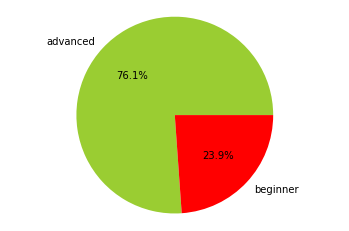

In [130]:
# Check Class variables that has 0 value for beginner transactions and 1 for advanced
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(y.value_counts(),autopct='%1.1f%%', labels=['advanced','beginner'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [131]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['classification'].values #target
    X = df.drop(columns=(["classification"]), axis = 1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [132]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [133]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [135]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Gunning Fog Index', 'Flesch Reading Ease', 'Flesch-Kincaid Grade',
       'classification'],
      dtype='object')
train-set size:  53 
test-set size:  14
fraud cases in test-set:  11
train-set confusion matrix:
 [[ 9  4]
 [ 9 31]]
test-set confusion matrix:
 [[1 2]
 [5 6]]
recall score:  0.5454545454545454
precision score:  0.75
f1 score:  0.631578947368421
accuracy score:  0.5
ROC AUC: 0.27272727272727276


In [136]:
# Case-NB-4 : drop classification
drop_list = ['classification']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Gunning Fog Index', 'Flesch Reading Ease', 'Flesch-Kincaid Grade'], dtype='object')


KeyError: 'classification'